Importing all libraries

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler


Fetching data from Alpha **Vintage**

In [146]:
import requests
#get this api key from vintage after sign in
API_key= "BX4KZJF2W789Q6LI"
url= f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey={API_key}'

response= requests.get(url)
data= response.json()


In [147]:
# Convert JSON to DataFrame
df = pd.DataFrame(data['Time Series FX (Daily)']).T
df

,1. open,2. high,3. low,4. close
2025-03-26,1.07921,1.07940,1.07850,1.07900
2025-03-25,1.07991,1.08301,1.07765,1.07908
2025-03-24,1.08168,1.08582,1.07813,1.07995
2025-03-21,1.08535,1.08613,1.07962,1.08121
2025-03-20,1.09045,1.09173,1.08143,1.08539
...,...,...,...,...
2024-11-13,1.06202,1.06540,1.05555,1.05622
2024-11-12,1.06534,1.06631,1.05946,1.06216
2024-11-11,1.07070,1.07280,1.06283,1.06533
2024-11-08,1.08021,1.08050,1.06865,1.07182


In [148]:
#rename columns
df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True)
df.head()
df=df.astype(float)
df.index=pd.to_datetime(df.index)
df

,Open,High,Low,Close
2025-03-26,1.07921,1.07940,1.07850,1.07900
2025-03-25,1.07991,1.08301,1.07765,1.07908
2025-03-24,1.08168,1.08582,1.07813,1.07995
2025-03-21,1.08535,1.08613,1.07962,1.08121
2025-03-20,1.09045,1.09173,1.08143,1.08539
...,...,...,...,...
2024-11-13,1.06202,1.06540,1.05555,1.05622
2024-11-12,1.06534,1.06631,1.05946,1.06216
2024-11-11,1.07070,1.07280,1.06283,1.06533
2024-11-08,1.08021,1.08050,1.06865,1.07182


In [149]:
df = df.sort_index(ascending=True)

In [150]:
df.head()

,Open,High,Low,Close
2024-11-07,1.07262,1.08247,1.07125,1.08038
2024-11-08,1.08021,1.08050,1.06865,1.07182
2024-11-11,1.07070,1.07280,1.06283,1.06533
2024-11-12,1.06534,1.06631,1.05946,1.06216
2024-11-13,1.06202,1.06540,1.05555,1.05622


key economic indicators (e.g., interest
rates, GDP growth, inflation).

In [151]:
!pip install fredapi

In [152]:
from fredapi import Fred
fred_api_key = 'de3f0d3126fb21b30dd8c1981ce5f2cf'
fred = Fred(api_key=fred_api_key)

In [153]:
start_date = '2024-11-06'
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch economic data with date parameters
print("Fetching economic data from FRED...")
gdp_data = fred.get_series('GDPC1', observation_start=start_date, observation_end=end_date)
cpi_data = fred.get_series('CPIAUCSL', observation_start=start_date, observation_end=end_date)
interest_rate_data = fred.get_series('FEDFUNDS', observation_start=start_date, observation_end=end_date)


# Creating DataFrame
economic_data = pd.DataFrame({
    'GDP': gdp_data,
    'CPI': cpi_data,
    'Interest_Rate': interest_rate_data
})
economic_data

Fetching economic data from FRED...


,GDP,CPI,Interest_Rate
2024-10-01,23536.293,NaN,NaN
2024-11-01,NaN,316.449,4.64
2024-12-01,NaN,317.603,4.48
2025-01-01,NaN,319.086,4.33
2025-02-01,NaN,319.775,4.33


In [154]:
economic_data = economic_data.sort_index(ascending=True)
economic_data

,GDP,CPI,Interest_Rate
2024-10-01,23536.293,NaN,NaN
2024-11-01,NaN,316.449,4.64
2024-12-01,NaN,317.603,4.48
2025-01-01,NaN,319.086,4.33
2025-02-01,NaN,319.775,4.33


In [82]:
economic_daily = economic_data.resample('D').ffill()
he=economic_daily.isna().sum()
he

,0
GDP,93
CPI,31
Interest_Rate,31


In [83]:
# Forward fill the missing values
economic_daily['GDP'] = economic_daily['GDP'].fillna(method='ffill')
economic_daily['CPI'] = economic_daily['CPI'].fillna(method='ffill')
economic_daily['Interest_Rate'] = economic_daily['Interest_Rate'].fillna(method='ffill')

<ipython-input-83-717776d5b5d6>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economic_daily['GDP'] = economic_daily['GDP'].fillna(method='ffill')
<ipython-input-83-717776d5b5d6>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economic_daily['CPI'] = economic_daily['CPI'].fillna(method='ffill')
<ipython-input-83-717776d5b5d6>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economic_daily['Interest_Rate'] = economic_daily['Interest_Rate'].fillna(method='ffill')


In [84]:
economic_daily

,GDP,CPI,Interest_Rate
2024-10-01,23536.293,NaN,NaN
2024-10-02,23536.293,NaN,NaN
2024-10-03,23536.293,NaN,NaN
2024-10-04,23536.293,NaN,NaN
2024-10-05,23536.293,NaN,NaN
...,...,...,...
2025-01-28,23536.293,319.086,4.33
2025-01-29,23536.293,319.086,4.33
2025-01-30,23536.293,319.086,4.33
2025-01-31,23536.293,319.086,4.33


In [85]:

#after doing forward fill new nan values are not filled hence i apply median to fill nan values
economic_daily['CPI'] = economic_daily['CPI'].fillna(economic_daily['CPI'].median())
economic_daily['Interest_Rate'] = economic_daily['Interest_Rate'].fillna(economic_daily['Interest_Rate'].median())
economic_daily

,GDP,CPI,Interest_Rate
2024-10-01,23536.293,317.603,4.48
2024-10-02,23536.293,317.603,4.48
2024-10-03,23536.293,317.603,4.48
2024-10-04,23536.293,317.603,4.48
2024-10-05,23536.293,317.603,4.48
...,...,...,...
2025-01-28,23536.293,319.086,4.33
2025-01-29,23536.293,319.086,4.33
2025-01-30,23536.293,319.086,4.33
2025-01-31,23536.293,319.086,4.33


In [86]:
df

,Open,High,Low,Close
2024-11-07,1.07262,1.08247,1.07125,1.08038
2024-11-08,1.08021,1.08050,1.06865,1.07182
2024-11-11,1.07070,1.07280,1.06283,1.06533
2024-11-12,1.06534,1.06631,1.05946,1.06216
2024-11-13,1.06202,1.06540,1.05555,1.05622
...,...,...,...,...
2025-03-20,1.09045,1.09173,1.08143,1.08539
2025-03-21,1.08535,1.08613,1.07962,1.08121
2025-03-24,1.08168,1.08582,1.07813,1.07995
2025-03-25,1.07991,1.08301,1.07765,1.07908


no nan values left in econometric data

In [87]:
combined_data = df.join(economic_daily, how='left')

In [88]:
combined_data

,Open,High,Low,Close,GDP,CPI,Interest_Rate
2024-11-07,1.07262,1.08247,1.07125,1.08038,23536.293,316.449,4.64
2024-11-08,1.08021,1.08050,1.06865,1.07182,23536.293,316.449,4.64
2024-11-11,1.07070,1.07280,1.06283,1.06533,23536.293,316.449,4.64
2024-11-12,1.06534,1.06631,1.05946,1.06216,23536.293,316.449,4.64
2024-11-13,1.06202,1.06540,1.05555,1.05622,23536.293,316.449,4.64
...,...,...,...,...,...,...,...
2025-03-20,1.09045,1.09173,1.08143,1.08539,NaN,NaN,NaN
2025-03-21,1.08535,1.08613,1.07962,1.08121,NaN,NaN,NaN
2025-03-24,1.08168,1.08582,1.07813,1.07995,NaN,NaN,NaN
2025-03-25,1.07991,1.08301,1.07765,1.07908,NaN,NaN,NaN


In [89]:
combined=combined_data.isna().sum()
combined


,0
Open,0
High,0
Low,0
Close,0
GDP,38
CPI,38
Interest_Rate,38


In [90]:
combined_data['GDP'] = combined_data['GDP'].fillna(method='ffill')
combined_data['CPI'] = combined_data['CPI'].fillna(method='ffill')
combined_data['Interest_Rate'] = combined_data['Interest_Rate'].fillna(method='ffill')
combined_data

<ipython-input-90-4cd31f26a931>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data['GDP'] = combined_data['GDP'].fillna(method='ffill')
<ipython-input-90-4cd31f26a931>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data['CPI'] = combined_data['CPI'].fillna(method='ffill')
<ipython-input-90-4cd31f26a931>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data['Interest_Rate'] = combined_data['Interest_Rate'].fillna(method='ffill')


,Open,High,Low,Close,GDP,CPI,Interest_Rate
2024-11-07,1.07262,1.08247,1.07125,1.08038,23536.293,316.449,4.64
2024-11-08,1.08021,1.08050,1.06865,1.07182,23536.293,316.449,4.64
2024-11-11,1.07070,1.07280,1.06283,1.06533,23536.293,316.449,4.64
2024-11-12,1.06534,1.06631,1.05946,1.06216,23536.293,316.449,4.64
2024-11-13,1.06202,1.06540,1.05555,1.05622,23536.293,316.449,4.64
...,...,...,...,...,...,...,...
2025-03-20,1.09045,1.09173,1.08143,1.08539,23536.293,319.086,4.33
2025-03-21,1.08535,1.08613,1.07962,1.08121,23536.293,319.086,4.33
2025-03-24,1.08168,1.08582,1.07813,1.07995,23536.293,319.086,4.33
2025-03-25,1.07991,1.08301,1.07765,1.07908,23536.293,319.086,4.33


In [91]:
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-11-07 to 2025-03-26
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           100 non-null    float64
 1   High           100 non-null    float64
 2   Low            100 non-null    float64
 3   Close          100 non-null    float64
 4   GDP            100 non-null    float64
 5   CPI            100 non-null    float64
 6   Interest_Rate  100 non-null    float64
dtypes: float64(7)
memory usage: 6.2 KB


## Task 1 :  **Feature  Engineering:**

Key Features Likely to Influence Exchange Rates

*   lagged_close (momentum)
*   log_return (interest-inflation balance)
*   7d_ma (trend direction)
*   daily_range (volatility)
*   norm_range (volatility)














In [102]:
combined_data['lagged_close'] = combined_data['Close'].shift(1)  # Price momentum
combined_data['log_returns'] = np.log(combined_data['Close']).diff()
combined_data['volatility_7d'] = combined_data['log_returns'].rolling(7).std()
combined_data['norm_range'] = combined_data['daily_range'] / combined_data['Close'].shift(1)

In [103]:
combined_data['daily_range'] = (combined_data['High'] - combined_data['Low']) / combined_data['Close']

In [104]:
combined_data["7d_ma"]= combined_data['Close'].rolling(window=7).mean()


In [105]:
combined_data

,Open,High,Low,Close,GDP,CPI,Interest_Rate,lagged_close,log_returns,volatility_7d,daily_range,norm_range,7d_ma
2024-11-07,1.07262,1.08247,1.07125,1.08038,23536.293,316.449,4.64,NaN,NaN,NaN,0.010385,NaN,NaN
2024-11-08,1.08021,1.08050,1.06865,1.07182,23536.293,316.449,4.64,1.08038,-0.007955,NaN,0.011056,0.010233,NaN
2024-11-11,1.07070,1.07280,1.06283,1.06533,23536.293,316.449,4.64,1.07182,-0.006074,NaN,0.009359,0.008732,NaN
2024-11-12,1.06534,1.06631,1.05946,1.06216,23536.293,316.449,4.64,1.06533,-0.002980,NaN,0.006449,0.006054,NaN
2024-11-13,1.06202,1.06540,1.05555,1.05622,23536.293,316.449,4.64,1.06216,-0.005608,NaN,0.009326,0.008780,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-20,1.09045,1.09173,1.08143,1.08539,23536.293,319.086,4.33,1.09033,-0.004541,0.003489,0.009490,0.008703,1.089083
2025-03-21,1.08535,1.08613,1.07962,1.08121,23536.293,319.086,4.33,1.08539,-0.003859,0.003649,0.006021,0.005547,1.088031
2025-03-24,1.08168,1.08582,1.07813,1.07995,23536.293,319.086,4.33,1.08121,-0.001166,0.003522,0.007121,0.006586,1.087296
2025-03-25,1.07991,1.08301,1.07765,1.07908,23536.293,319.086,4.33,1.07995,-0.000806,0.003262,0.004967,0.004599,1.086071


In [106]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-11-07 to 2025-03-26
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           100 non-null    float64
 1   High           100 non-null    float64
 2   Low            100 non-null    float64
 3   Close          100 non-null    float64
 4   GDP            100 non-null    float64
 5   CPI            100 non-null    float64
 6   Interest_Rate  100 non-null    float64
 7   lagged_close   99 non-null     float64
 8   log_returns    99 non-null     float64
 9   volatility_7d  93 non-null     float64
 10  daily_range    100 non-null    float64
 11  norm_range     99 non-null     float64
 12  7d_ma          94 non-null     float64
dtypes: float64(13)
memory usage: 10.9 KB


fillna with median value and forward fill of nan value

In [107]:
combined_data['CPI'] = combined_data['CPI'].ffill()
combined_data['Interest_Rate'] = combined_data['Interest_Rate'].ffill()

combined_data['7d_ma'] = combined_data['7d_ma'].fillna(combined_data['7d_ma'].median())

In [114]:
combined_data['lagged_close'] = combined_data['lagged_close'].fillna(combined_data['lagged_close'].median())
combined_data['volatility_7d'] = combined_data['volatility_7d'].fillna(combined_data['volatility_7d'].median())
combined_data['log_returns'] = combined_data['log_returns'].fillna(combined_data['log_returns'].median())
combined_data['norm_range'] = combined_data['norm_range'].fillna(combined_data['norm_range'].median())

In [116]:
print(combined_data.isnull().sum())

Open             0
High             0
Low              0
Close            0
GDP              0
CPI              0
Interest_Rate    0
lagged_close     0
log_returns      0
volatility_7d    0
daily_range      0
norm_range       0
7d_ma            0
dtype: int64


In [117]:
combined_data.head()

,Open,High,Low,Close,GDP,CPI,Interest_Rate,lagged_close,log_returns,volatility_7d,daily_range,norm_range,7d_ma
2024-11-07,1.07262,1.08247,1.07125,1.08038,23536.293,316.449,4.64,1.04836,-0.000696,0.004471,0.010385,0.006956,1.045579
2024-11-08,1.08021,1.08050,1.06865,1.07182,23536.293,316.449,4.64,1.08038,-0.007955,0.004471,0.011056,0.010233,1.045579
2024-11-11,1.07070,1.07280,1.06283,1.06533,23536.293,316.449,4.64,1.07182,-0.006074,0.004471,0.009359,0.008732,1.045579
2024-11-12,1.06534,1.06631,1.05946,1.06216,23536.293,316.449,4.64,1.06533,-0.002980,0.004471,0.006449,0.006054,1.045579
2024-11-13,1.06202,1.06540,1.05555,1.05622,23536.293,316.449,4.64,1.06216,-0.005608,0.004471,0.009326,0.008780,1.045579


In [71]:
# removing all unnecsaary data that create redundency in dataset
# combined_data = combined_data.drop(columns=['Open', 'High', 'Low'])

min-max scaled

In [119]:

constant_cols = [col for col in combined_data.columns if combined_data[col].nunique() == 1]
combined_data = combined_data.drop(columns=constant_cols)


cols_to_normalize = ['Open', 'High', 'Low', 'Close', 'lagged_close', 'log_returns', 'volatility_7d', 'daily_range', 'norm_range', '7d_ma']

#Apply Min-Max normalization
scaler = MinMaxScaler()
combined_data[cols_to_normalize] = scaler.fit_transform(combined_data[cols_to_normalize])

combined_data.head()

,Open,High,Low,Close,CPI,Interest_Rate,lagged_close,log_returns,volatility_7d,daily_range,norm_range,7d_ma
2024-11-07,0.694491,0.815524,0.748776,0.799486,316.449,4.64,0.342188,0.444909,0.320919,0.557685,0.385087,0.285507
2024-11-08,0.801152,0.787569,0.712407,0.677235,316.449,4.64,0.799486,0.190639,0.320919,0.596211,0.585294,0.285507
2024-11-11,0.667510,0.678303,0.630997,0.584547,316.449,4.64,0.677235,0.256537,0.320919,0.498715,0.493537,0.285507
2024-11-12,0.592187,0.586207,0.583858,0.539274,316.449,4.64,0.584547,0.364901,0.320919,0.331595,0.329935,0.285507
2024-11-13,0.545531,0.573294,0.529165,0.454442,316.449,4.64,0.539274,0.272841,0.320919,0.496826,0.496496,0.285507


In [122]:
# List of economic columns to standardize
cols_to_standardize = [ 'CPI', 'Interest_Rate']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Standardize the economic columns
combined_data[cols_to_standardize] = scaler.fit_transform(combined_data[cols_to_standardize])

# Check the result to ensure they have mean 0 and standard deviation 1
print(combined_data[cols_to_standardize].mean())
print(combined_data[cols_to_standardize].std())

CPI             -7.874368e-14
Interest_Rate    1.417755e-14
dtype: float64
CPI              1.005038
Interest_Rate    1.005038
dtype: float64


In [123]:
combined_data.head()

,Open,High,Low,Close,CPI,Interest_Rate,lagged_close,log_returns,volatility_7d,daily_range,norm_range,7d_ma
2024-11-07,0.694491,0.815524,0.748776,0.799486,-1.803825,1.899585,0.342188,0.444909,0.320919,0.557685,0.385087,0.285507
2024-11-08,0.801152,0.787569,0.712407,0.677235,-1.803825,1.899585,0.799486,0.190639,0.320919,0.596211,0.585294,0.285507
2024-11-11,0.667510,0.678303,0.630997,0.584547,-1.803825,1.899585,0.677235,0.256537,0.320919,0.498715,0.493537,0.285507
2024-11-12,0.592187,0.586207,0.583858,0.539274,-1.803825,1.899585,0.584547,0.364901,0.320919,0.331595,0.329935,0.285507
2024-11-13,0.545531,0.573294,0.529165,0.454442,-1.803825,1.899585,0.539274,0.272841,0.320919,0.496826,0.496496,0.285507


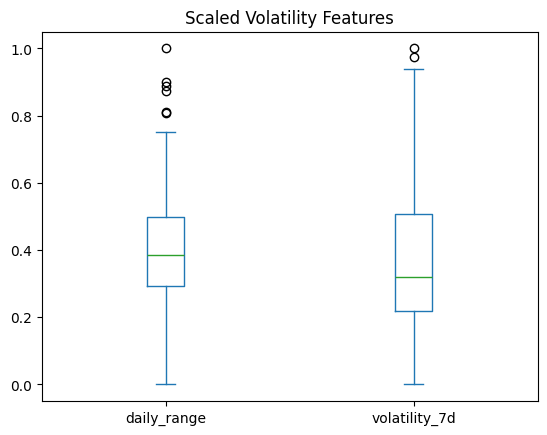

In [124]:
import matplotlib.pyplot as plt
combined_data[['daily_range', 'volatility_7d']].plot(kind='box', title='Scaled Volatility Features')
plt.show()

# Model Building

In [127]:
# input and target variable
combined_data['target'] = combined_data['Close'].shift(-1)
combined_data = combined_data.dropna()

# Features
features = ['Open', 'High', 'Low', 'Close', 'lagged_close', 'log_returns', 'volatility_7d', 'daily_range', '7d_ma']

# Target variable
target = 'target'

<ipython-input-127-bec3b7bdb9f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['target'] = combined_data['Close'].shift(-1)


Splitting data

In [128]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = combined_data[features]
y = combined_data[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(                Open      High       Low     Close  lagged_close  log_returns  \
 2025-01-15  0.105958  0.148148  0.114142  0.060126      0.090831     0.396149   
 2025-02-13  0.210512  0.307932  0.273325  0.314339      0.197658     0.743867   
 2025-02-11  0.104272  0.186604  0.160162  0.166238      0.088975     0.652691   
 2024-11-28  0.468241  0.454094  0.489439  0.435447      0.459869     0.412554   
 2025-01-01  0.177066  0.154676  0.244510  0.154242      0.154527     0.468615   
 ...              ...       ...       ...       ...           ...          ...   
 2025-01-30  0.264615  0.309210  0.291929  0.204941      0.252356     0.357510   
 2025-02-14  0.323918  0.374769  0.377256  0.353185      0.314339     0.560230   
 2024-11-27  0.358066  0.479353  0.415163  0.459869      0.348329     0.729183   
 2025-03-17  0.910624  0.964524  0.966289  0.967152      0.903313     0.612962   
 2025-01-17  0.090641  0.114375  0.122814  0.038560      0.078549     0.373926   
 
             v

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse}, R2: {r2}')


Linear Regression - MSE: 0.01366686310060376, R2: 0.7736993712927294


In [132]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')


Random Forest - MSE: 0.008917154641763545, R2: 0.8523466806642777


In [133]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Convert data to DMatrix format for XGBoost (recommended for performance)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'max_depth': 5,  # Depth of trees
    'learning_rate': 0.1,  # Learning rate
    'n_estimators': 100  # Number of boosting rounds
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:25:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - MSE: 0.010346415568642204, R2: 0.8286804857255805


Hyper parameter tunning

In [135]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [136]:
# Get the best parameters and evaluate
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)


Best parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [137]:
# Evaluate the tuned Random Forest model
mse_best_rf = mean_squared_error(y_test, y_pred_rf_best)
r2_best_rf = r2_score(y_test, y_pred_rf_best)

print(f'Tuned Random Forest - MSE: {mse_best_rf}, R2: {r2_best_rf}')

Tuned Random Forest - MSE: 0.00880423830156845, R2: 0.8542163883352607


Model Evaluation

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Model Evaluation for linear model

In [158]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_lr)

# Print the results
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 0.11690535958887326
Mean Absolute Error (MAE): 0.07814775516100234


Model Evaluation for Random Forest

In [159]:
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print results
print(f'Random Forest - RMSE: {rmse_rf}')
print(f'Random Forest - MAE: {mae_rf}')

Random Forest - RMSE: 0.09443068697072761
Random Forest - MAE: 0.06456576692373618


Model Evaluation for XGBoost

In [160]:
y_pred_xgb = xgb_model.predict(dtest)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate MAE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print results
print(f'XGBoost - RMSE: {rmse_xgb}')
print(f'XGBoost - MAE: {mae_xgb}')

XGBoost - RMSE: 0.10171733170233185
XGBoost - MAE: 0.07450173833971166


# Comparison Model Evaluation

| **Model**        | **Root Mean Squared Error (RMSE)** | **Mean Absolute Error (MAE)** |
|------------------|-----------------------------------|-------------------------------|
| **Linear Regression** | 0.1169                            | 0.0781                        |
| **XGBoost**      | 0.1017                            | 0.0745                        |
| **Random Forest** | 0.0944                            | 0.0646                        |
